# 1. Pokedex EDA

- Beautiful Soup Webscraper script sourced code by Ryan Luu, https://github.com/ryanluuwas/Bulbapedia-Web-Scraper

## 1.1 Webscrape Data Collection (Beautiful Soup)

    - The data collected represents all known species of pokemon from generations 1 - 8, excluding generation variations.

    - Each Generation introduces alterations to some pokemon including changes in primary and  secondary type,and the Health - BST ( Base Stat ) values. 

    - The Data Collected does not represent those changes, but will show often show duplicates for those pokemon that fall into this category.

    - The Data Collected was from the root url https://bulbapedia.bulbagarden.net/ followed by the pageurl "wiki/List_of_Pokémon_by_National_Pokédex_number" and then the respective pokemon url.

    Feature Extraction
 
    - The Features extracted were:
        - Pokedex # :  Dex No.
        - Pokemon Name : Name
        - Generation Represented : Generation
        - Pokemon Primary Type : Primary Type
        - Pokemon Secondary Type : Secondary Type
        - Hit Points : Health
        - Pokemon Attack Stat : Attack
        - Pokemon Defense Stat : Defense
        - Pokemon Special Attack Stat Sp. Attack
        - Pokemon Special Defense Stat: Sp. Defense
        - Pokemon Speed Stat : Speed
        - Pokemon Base Stat ( total of all stats ) : BST
        
 



## 1.2 Import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
sns.set_theme(style="whitegrid")
%matplotlib inline

In [6]:
pokedex = pd.read_csv('/Users/jtc/Desktop/Pokedex_EDA_Project/Data/bulbapedia_data.csv')

## 1.3 DataFrame Cleaning and Aggregation
**Getting a sense of the data set**

In [7]:
print(pokedex.head())


  Dex No.        Name    Generation Primary Type Secondary Type  Health  \
0    #001   Bulbasaur  Generation I        Grass         Poison      45   
1    #002     Ivysaur  Generation I        Grass         Poison      60   
2    #003    Venusaur  Generation I        Grass         Poison      80   
3    #004  Charmander  Generation I         Fire        Unknown      39   
4    #005  Charmeleon  Generation I         Fire        Unknown      58   

   Attack  Defense  Sp. Attack  Sp. Defense  Speed  BST  
0      49       49          65           65     45  318  
1      62       63          80           80     60  405  
2      82       83         100          100     80  525  
3      52       43          60           50     65  309  
4      64       58          80           65     80  405  


In [8]:
pokedex.shape

(958, 12)

**958 Rows & 12 Columns**

### 1.3.1 Replacing NaN Values.
**Checking for Null vals, NAN , Duplicates and understanding row Dtypes.**

- When this data was scraped it appeared that out of the 958 values for generation 876 were actually scraped. After inspection my findings showed that generation VIII were missing labels.
    - **876** out of **958** values were filled.

In [9]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Dex No.         958 non-null    object
 1   Name            958 non-null    object
 2   Generation      876 non-null    object
 3   Primary Type    958 non-null    object
 4   Secondary Type  958 non-null    object
 5   Health          958 non-null    int64 
 6   Attack          958 non-null    int64 
 7   Defense         958 non-null    int64 
 8   Sp. Attack      958 non-null    int64 
 9   Sp. Defense     958 non-null    int64 
 10  Speed           958 non-null    int64 
 11  BST             958 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 89.9+ KB


In [10]:
pokedex['Generation'].fillna('Generation VIII', inplace = True)

In [11]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Dex No.         958 non-null    object
 1   Name            958 non-null    object
 2   Generation      958 non-null    object
 3   Primary Type    958 non-null    object
 4   Secondary Type  958 non-null    object
 5   Health          958 non-null    int64 
 6   Attack          958 non-null    int64 
 7   Defense         958 non-null    int64 
 8   Sp. Attack      958 non-null    int64 
 9   Sp. Defense     958 non-null    int64 
 10  Speed           958 non-null    int64 
 11  BST             958 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 89.9+ KB


### 1.3.2 Removing Duplicate Rows 

- It appears that some rows are duplicated, this is do to some pokemon having multiple forms.
- Lets go ahead and remove those extra rows, as they are temporary forms 
and can create massive outliers when representing the data.


In [12]:
cleaned_pokedex = pokedex.drop_duplicates()

In [13]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(cleaned_pokedex.head())

  Dex No.        Name    Generation Primary Type Secondary Type  Health  \
0    #001   Bulbasaur  Generation I        Grass         Poison      45   
1    #002     Ivysaur  Generation I        Grass         Poison      60   
2    #003    Venusaur  Generation I        Grass         Poison      80   
3    #004  Charmander  Generation I         Fire        Unknown      39   
4    #005  Charmeleon  Generation I         Fire        Unknown      58   

   Attack  Defense  Sp. Attack  Sp. Defense  Speed  BST  
0      49       49          65           65     45  318  
1      62       63          80           80     60  405  
2      82       83         100          100     80  525  
3      52       43          60           50     65  309  
4      64       58          80           65     80  405  


### 1.3.3 Replacing Column values

- It appears that the column Generation begins showing "On Smogon Pokédex" between 722-809. I will remove that and replace with "Generation VII".This is due to the pokemon that fall within range belong to that Generation.


In [14]:
cleaned_pokedex['Generation'] = cleaned_pokedex['Generation'].replace(['On Smogon Pokédex'],'Generation VII')

<ipython-input-14-c7a7feae8fe7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_pokedex['Generation'] = cleaned_pokedex['Generation'].replace(['On Smogon Pokédex'],'Generation VII')


In [15]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(cleaned_pokedex.head())

  Dex No.        Name    Generation Primary Type Secondary Type  Health  \
0    #001   Bulbasaur  Generation I        Grass         Poison      45   
1    #002     Ivysaur  Generation I        Grass         Poison      60   
2    #003    Venusaur  Generation I        Grass         Poison      80   
3    #004  Charmander  Generation I         Fire        Unknown      39   
4    #005  Charmeleon  Generation I         Fire        Unknown      58   

   Attack  Defense  Sp. Attack  Sp. Defense  Speed  BST  
0      49       49          65           65     45  318  
1      62       63          80           80     60  405  
2      82       83         100          100     80  525  
3      52       43          60           50     65  309  
4      64       58          80           65     80  405  


### 1.3.4 Appending Missing Rows

- Upon further inspection it appears that the Web Scraper missed the last three rows.
When I went to scrape those remaining rows there was some discrepancy after the 959 value. So I will be adding in those remaining Rows manually, appending them to the data frame.

In [16]:
# -----------
Crowed_Sword_Zacian = {'Dex No.': '#888','Name':'Crowned Sword Zacian','Generation':'Generation VIII','Primary Type':'Fairy','Secondary Type':' Steel','Health': 92, 'Attack': 170, 'Defense': 115, 'Sp. Attack': 80, 'Sp. Defense': 115, 'Speed': 148, 'BST': 720}
cleaned_pokedex = cleaned_pokedex.append(Crowed_Sword_Zacian, ignore_index = True)
# -----------
Crowed_Shield_Zamazenta = {'Dex No.': '#889','Name':'Crowned Shield Zamazenta','Generation':'Generation VIII','Primary Type':'Fighting','Secondary Type':' Steel','Health': 92, 'Attack': 130, 'Defense': 45, 'Sp. Attack': 80, 'Sp. Defense': 145, 'Speed': 128, 'BST': 720}
cleaned_pokedex = cleaned_pokedex.append(Crowed_Shield_Zamazenta, ignore_index = True)
# -----------
Eternatus = {'Dex No.': '#890','Name':'Eternatus','Generation':'Generation VIII','Primary Type':'Poison','Secondary Type':' Dragon','Health': 140, 'Attack': 85, 'Defense': 95, 'Sp. Attack': 145, 'Sp. Defense': 95, 'Speed': 130, 'BST': 690}
cleaned_pokedex = cleaned_pokedex.append(Eternatus, ignore_index = True)
# -----------

## 1.4  Feature Engineering

- Seperating Base Stat ( BST ) into tiers derived from Pokemon Commmunity Vocabulary.
- Uber : Highest tier
- OU : Over used 
- UU : Under Used
- RU  : Rarely Used
- NU  :  Never Used
- LC : Little Cub
- Creating a Feature called "Tier" to represent the Base Stat Categories 

### 1.4.1 Label Encoding Pokemon Types
- This is for future machine learning and to understand correlations between types and stats.

In [17]:
labelencoder = LabelEncoder()

cleaned_pokedex['Primary_Type_Cat'] = labelencoder.fit_transform(cleaned_pokedex['Primary Type'])


### 1.4.2 Creating Labels to categorize pokemon on base stat tier.

(array([207.,   0., 324.,   0., 184.,   0., 153.,   0.,  21.,   3.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

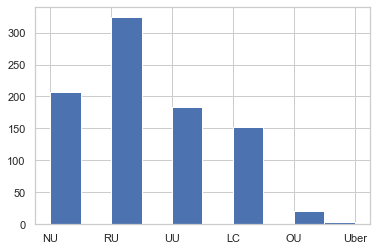

In [18]:
cleaned_pokedex['Tier'] = pd.cut(cleaned_pokedex["BST"],
                                bins=[100,300,400,500,600,700, np.inf],
                                labels=["LC","NU","RU","UU","OU","Uber"])
plt.hist(cleaned_pokedex['Tier'])

### 1.4.3  Creating Features by joining stats from archtypes.

- These Features are the pokemon communities combination of stats base on competitive pokemon builds.
- Higher Values are more favorable.

In [19]:
# Physical Sweeper
cleaned_pokedex["Physical_Sweeper"] = cleaned_pokedex["Attack"] + cleaned_pokedex["Speed"]

# Special Sweeper
cleaned_pokedex["Special_Sweeper"] = cleaned_pokedex["Sp. Attack"] + cleaned_pokedex["Speed"]

# Wall
cleaned_pokedex["Wall"] = cleaned_pokedex["Health"] + cleaned_pokedex["Defense"] + cleaned_pokedex["Sp. Defense"]

# Physical Tank
cleaned_pokedex["Physical_Tank"] = cleaned_pokedex["Attack"] + cleaned_pokedex["Defense"]

# Special Tank
cleaned_pokedex["Special_Tank"] = cleaned_pokedex["Sp. Attack"] + cleaned_pokedex["Sp. Defense"]



## 1.5 Looking for Correlations and Describing Data

In [20]:
corr_matrix = cleaned_pokedex.corr()
corr_matrix['BST'].sort_values(ascending=False)


BST                 1.000000
Wall                0.856327
Special_Tank        0.818959
Physical_Tank       0.782335
Physical_Sweeper    0.773397
Special_Sweeper     0.749229
Attack              0.719394
Sp. Attack          0.713955
Sp. Defense         0.701346
Health              0.655868
Defense             0.614110
Speed               0.547791
Primary_Type_Cat    0.026711
Name: BST, dtype: float64

### 1.5.1 Describing Data

In [21]:
cleaned_pokedex.describe()

,Health,Attack,Defense,Sp. Attack,Sp. Defense,Speed,BST,Primary_Type_Cat,Physical_Sweeper,Special_Sweeper,Wall,Physical_Tank,Special_Tank
count,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000
mean,68.614350,76.263453,71.691704,69.420404,69.847534,65.745516,421.695067,9.464126,142.008969,135.165919,210.153587,147.955157,139.267937
std,25.832694,29.647936,29.617809,29.260342,27.193022,28.165082,112.149357,5.531448,47.526848,48.475357,63.297278,50.511772,48.796434
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,0.000000,15.000000,15.000000,70.000000,10.000000,35.000000
25%,50.000000,55.000000,50.000000,45.750000,50.000000,45.000000,320.000000,5.000000,108.000000,100.000000,160.000000,110.000000,100.000000
50%,65.000000,75.000000,67.000000,65.000000,65.000000,65.000000,435.000000,10.000000,140.000000,130.000000,209.500000,145.000000,135.000000
75%,80.000000,95.000000,90.000000,90.000000,85.000000,85.000000,500.000000,14.000000,175.000000,168.000000,255.000000,183.000000,174.250000
max,255.000000,181.000000,230.000000,173.000000,230.000000,160.000000,720.000000,17.000000,318.000000,300.000000,480.000000,342.000000,300.000000


## 1.6 Early Data Visualization 

###  1.6.1 Health Stat Distribution

[Text(0, 0, 'Grass'), Text(1, 0, 'Fire'), Text(2, 0, 'Water'), Text(3, 0, 'Bug'), Text(4, 0, 'Normal'), Text(5, 0, 'Poison'), Text(6, 0, 'Electric'), Text(7, 0, 'Ground'), Text(8, 0, 'Fairy'), Text(9, 0, 'Fighting'), Text(10, 0, 'Psychic'), Text(11, 0, 'Rock'), Text(12, 0, 'Ghost'), Text(13, 0, 'Ice'), Text(14, 0, 'Dragon'), Text(15, 0, 'Dark'), Text(16, 0, 'Steel'), Text(17, 0, 'Flying')]


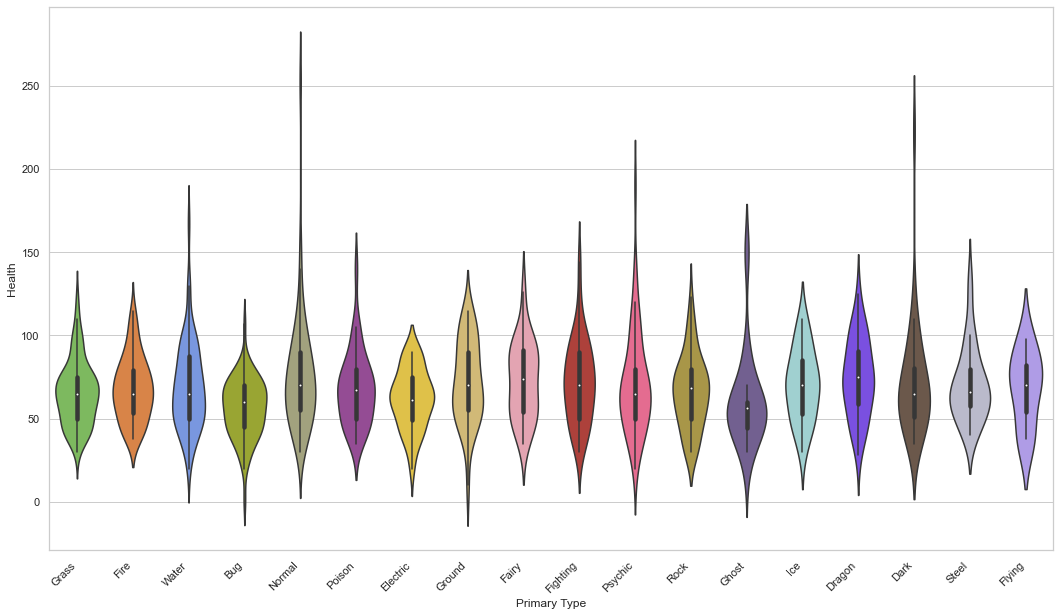

In [22]:
# Color Orient the types
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                    '#705746',  # Dark
                    '#B7B7CE',  # Steel
                    '#A98FF3',  # Flying
                   ]

plt.figure(figsize=(18,10))
chart = sns.violinplot(x = 'Primary Type',
                       y = 'Health',
                       data = cleaned_pokedex,
                       palette = pkmn_type_colors)
print(chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment ='right'))

### 1.6.2 Attack Stat Distribution

[Text(0, 0, 'Grass'), Text(1, 0, 'Fire'), Text(2, 0, 'Water'), Text(3, 0, 'Bug'), Text(4, 0, 'Normal'), Text(5, 0, 'Poison'), Text(6, 0, 'Electric'), Text(7, 0, 'Ground'), Text(8, 0, 'Fairy'), Text(9, 0, 'Fighting'), Text(10, 0, 'Psychic'), Text(11, 0, 'Rock'), Text(12, 0, 'Ghost'), Text(13, 0, 'Ice'), Text(14, 0, 'Dragon'), Text(15, 0, 'Dark'), Text(16, 0, 'Steel'), Text(17, 0, 'Flying')]


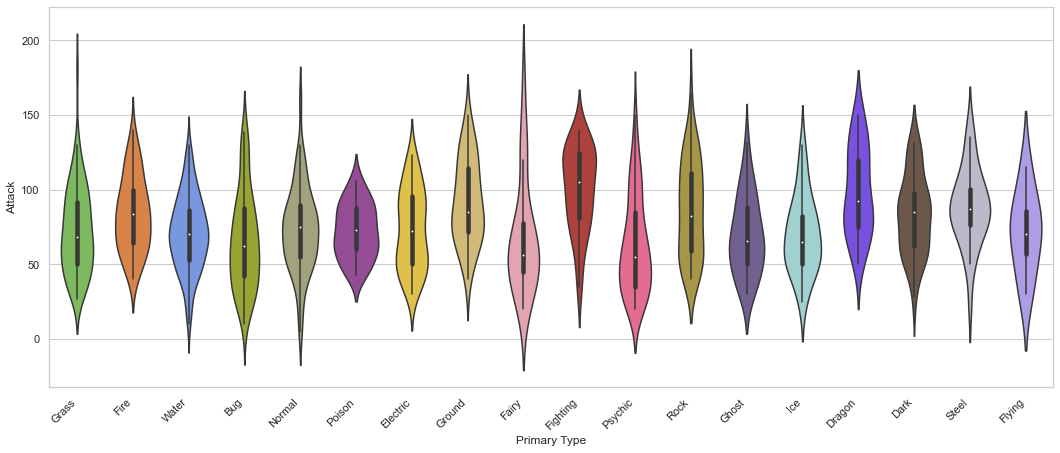

In [23]:
plt.figure(figsize=(18,7))
chart = sns.violinplot(x = 'Primary Type',
                       y = 'Attack',
                       data = cleaned_pokedex,
                       palette = pkmn_type_colors)
print(chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment ='right'))

### 1.6.3 Defense Stat Distribution

[Text(0, 0, 'Grass'), Text(1, 0, 'Fire'), Text(2, 0, 'Water'), Text(3, 0, 'Bug'), Text(4, 0, 'Normal'), Text(5, 0, 'Poison'), Text(6, 0, 'Electric'), Text(7, 0, 'Ground'), Text(8, 0, 'Fairy'), Text(9, 0, 'Fighting'), Text(10, 0, 'Psychic'), Text(11, 0, 'Rock'), Text(12, 0, 'Ghost'), Text(13, 0, 'Ice'), Text(14, 0, 'Dragon'), Text(15, 0, 'Dark'), Text(16, 0, 'Steel'), Text(17, 0, 'Flying')]


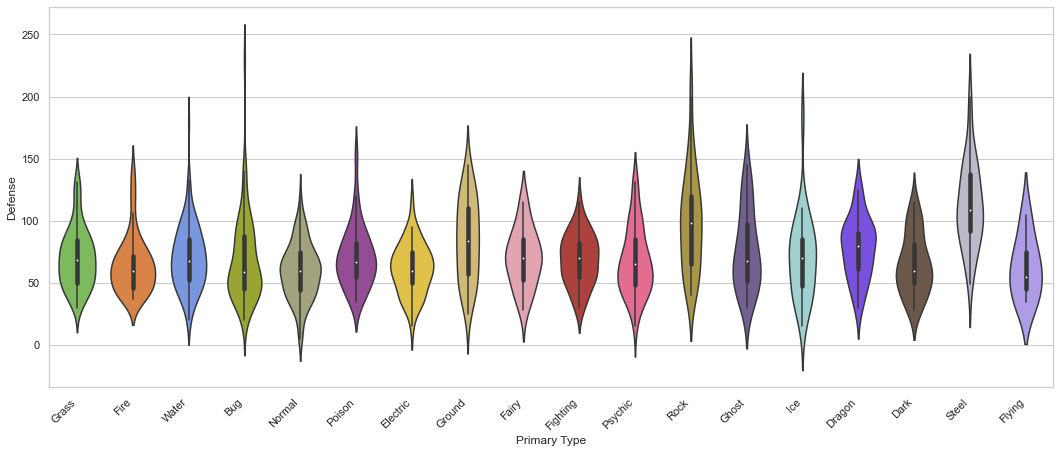

In [24]:
plt.figure(figsize=(18,7))
chart = sns.violinplot(x = 'Primary Type',
                       y = 'Defense',
                       data = cleaned_pokedex,
                       palette = pkmn_type_colors)
print(chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment ='right'))

### 1.6.4 Sp.Attack Stat Distribution

[Text(0, 0, 'Grass'), Text(1, 0, 'Fire'), Text(2, 0, 'Water'), Text(3, 0, 'Bug'), Text(4, 0, 'Normal'), Text(5, 0, 'Poison'), Text(6, 0, 'Electric'), Text(7, 0, 'Ground'), Text(8, 0, 'Fairy'), Text(9, 0, 'Fighting'), Text(10, 0, 'Psychic'), Text(11, 0, 'Rock'), Text(12, 0, 'Ghost'), Text(13, 0, 'Ice'), Text(14, 0, 'Dragon'), Text(15, 0, 'Dark'), Text(16, 0, 'Steel'), Text(17, 0, 'Flying')]


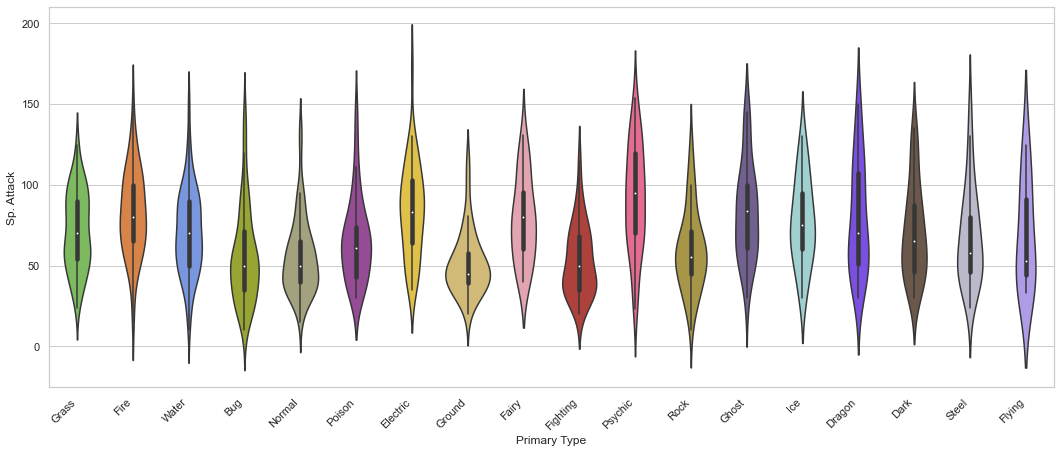

In [25]:
plt.figure(figsize=(18,7))
chart = sns.violinplot(x = 'Primary Type',
                       y = 'Sp. Attack',
                       data = cleaned_pokedex,
                       palette = pkmn_type_colors)
print(chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment ='right'))

### 1.6.4 Sp.Defense Stat Distribution

[Text(0, 0, 'Grass'), Text(1, 0, 'Fire'), Text(2, 0, 'Water'), Text(3, 0, 'Bug'), Text(4, 0, 'Normal'), Text(5, 0, 'Poison'), Text(6, 0, 'Electric'), Text(7, 0, 'Ground'), Text(8, 0, 'Fairy'), Text(9, 0, 'Fighting'), Text(10, 0, 'Psychic'), Text(11, 0, 'Rock'), Text(12, 0, 'Ghost'), Text(13, 0, 'Ice'), Text(14, 0, 'Dragon'), Text(15, 0, 'Dark'), Text(16, 0, 'Steel'), Text(17, 0, 'Flying')]


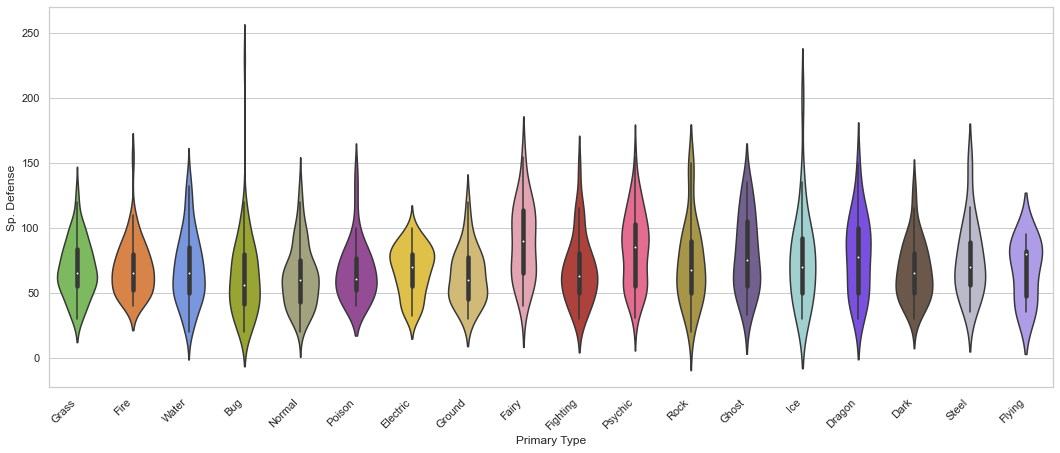

In [26]:
plt.figure(figsize=(18,7))
chart = sns.violinplot(x = 'Primary Type',
                       y = 'Sp. Defense',
                       data = cleaned_pokedex,
                       palette = pkmn_type_colors)
print(chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment ='right'))

### 1.6.5 Speed Stat Distribution

[Text(0, 0, 'Grass'), Text(1, 0, 'Fire'), Text(2, 0, 'Water'), Text(3, 0, 'Bug'), Text(4, 0, 'Normal'), Text(5, 0, 'Poison'), Text(6, 0, 'Electric'), Text(7, 0, 'Ground'), Text(8, 0, 'Fairy'), Text(9, 0, 'Fighting'), Text(10, 0, 'Psychic'), Text(11, 0, 'Rock'), Text(12, 0, 'Ghost'), Text(13, 0, 'Ice'), Text(14, 0, 'Dragon'), Text(15, 0, 'Dark'), Text(16, 0, 'Steel'), Text(17, 0, 'Flying')]


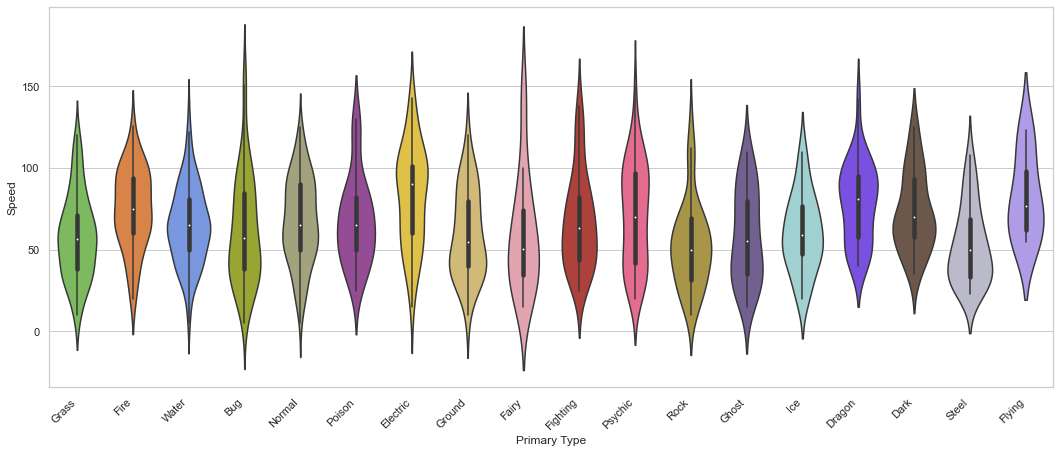

In [27]:
plt.figure(figsize=(18,7))
chart = sns.violinplot(x = 'Primary Type',
                       y = 'Speed',
                       data = cleaned_pokedex,
                       palette = pkmn_type_colors)
print(chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment ='right'))

### 1.6.6 Base Stat Distribution

[Text(0, 0, 'Grass'), Text(1, 0, 'Fire'), Text(2, 0, 'Water'), Text(3, 0, 'Bug'), Text(4, 0, 'Normal'), Text(5, 0, 'Poison'), Text(6, 0, 'Electric'), Text(7, 0, 'Ground'), Text(8, 0, 'Fairy'), Text(9, 0, 'Fighting'), Text(10, 0, 'Psychic'), Text(11, 0, 'Rock'), Text(12, 0, 'Ghost'), Text(13, 0, 'Ice'), Text(14, 0, 'Dragon'), Text(15, 0, 'Dark'), Text(16, 0, 'Steel'), Text(17, 0, 'Flying')]


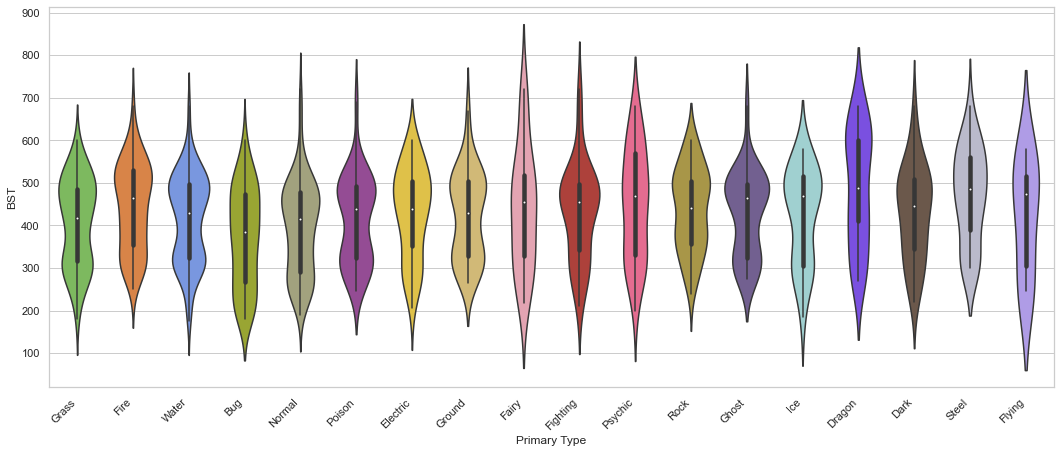

In [28]:
plt.figure(figsize=(18,7))
chart = sns.violinplot(x = 'Primary Type',
                       y = 'BST',
                       data = cleaned_pokedex,
                       palette = pkmn_type_colors)
print(chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment ='right'))

## 1.7 Further Data Visualization 

### 1.7.1 Histogram Distribution of all stat features

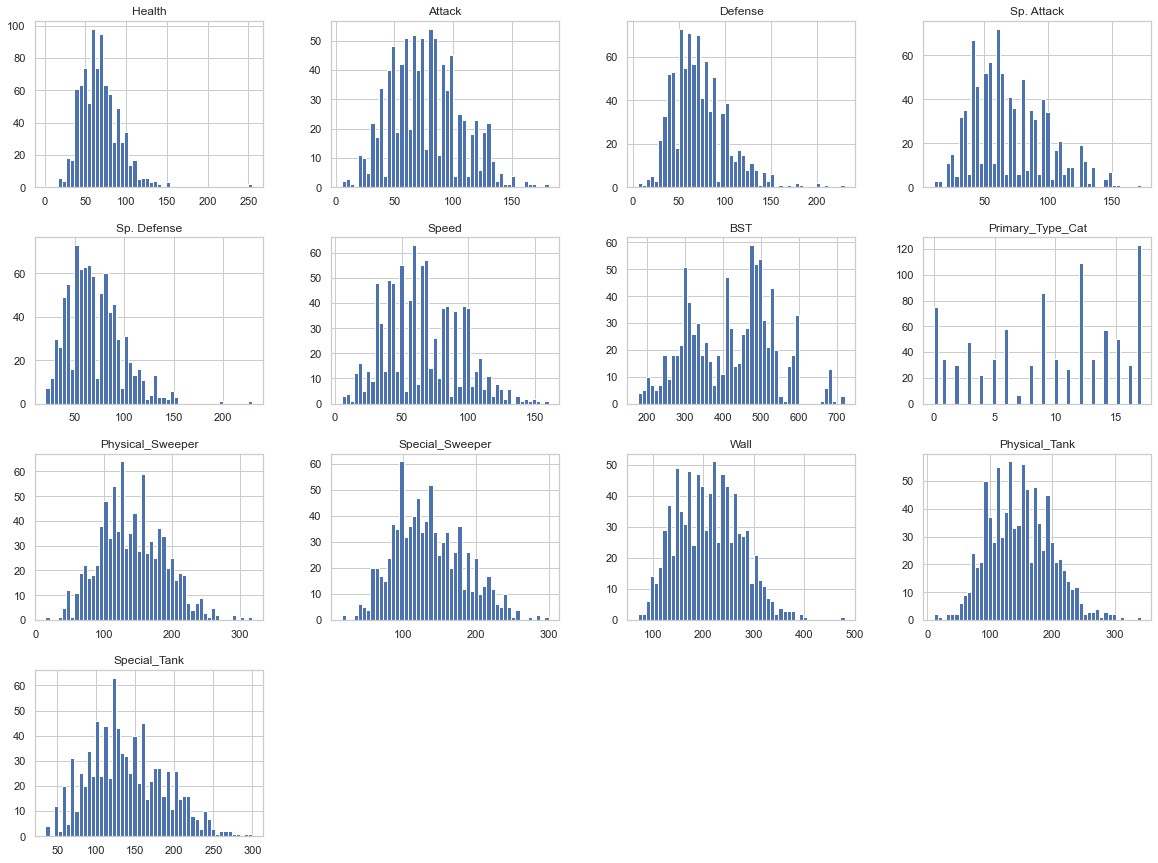

In [29]:
cleaned_pokedex.hist(bins=50, figsize=(20,15))
plt.show()


### 1.7.2 Scatter Matrix of three primary stat correlations to Base Stat
- From section 1.5

array([[<AxesSubplot:xlabel='BST', ylabel='BST'>,
        <AxesSubplot:xlabel='Attack', ylabel='BST'>,
        <AxesSubplot:xlabel='Sp. Attack', ylabel='BST'>,
        <AxesSubplot:xlabel='Sp. Defense', ylabel='BST'>],
       [<AxesSubplot:xlabel='BST', ylabel='Attack'>,
        <AxesSubplot:xlabel='Attack', ylabel='Attack'>,
        <AxesSubplot:xlabel='Sp. Attack', ylabel='Attack'>,
        <AxesSubplot:xlabel='Sp. Defense', ylabel='Attack'>],
       [<AxesSubplot:xlabel='BST', ylabel='Sp. Attack'>,
        <AxesSubplot:xlabel='Attack', ylabel='Sp. Attack'>,
        <AxesSubplot:xlabel='Sp. Attack', ylabel='Sp. Attack'>,
        <AxesSubplot:xlabel='Sp. Defense', ylabel='Sp. Attack'>],
       [<AxesSubplot:xlabel='BST', ylabel='Sp. Defense'>,
        <AxesSubplot:xlabel='Attack', ylabel='Sp. Defense'>,
        <AxesSubplot:xlabel='Sp. Attack', ylabel='Sp. Defense'>,
        <AxesSubplot:xlabel='Sp. Defense', ylabel='Sp. Defense'>]],
      dtype=object)

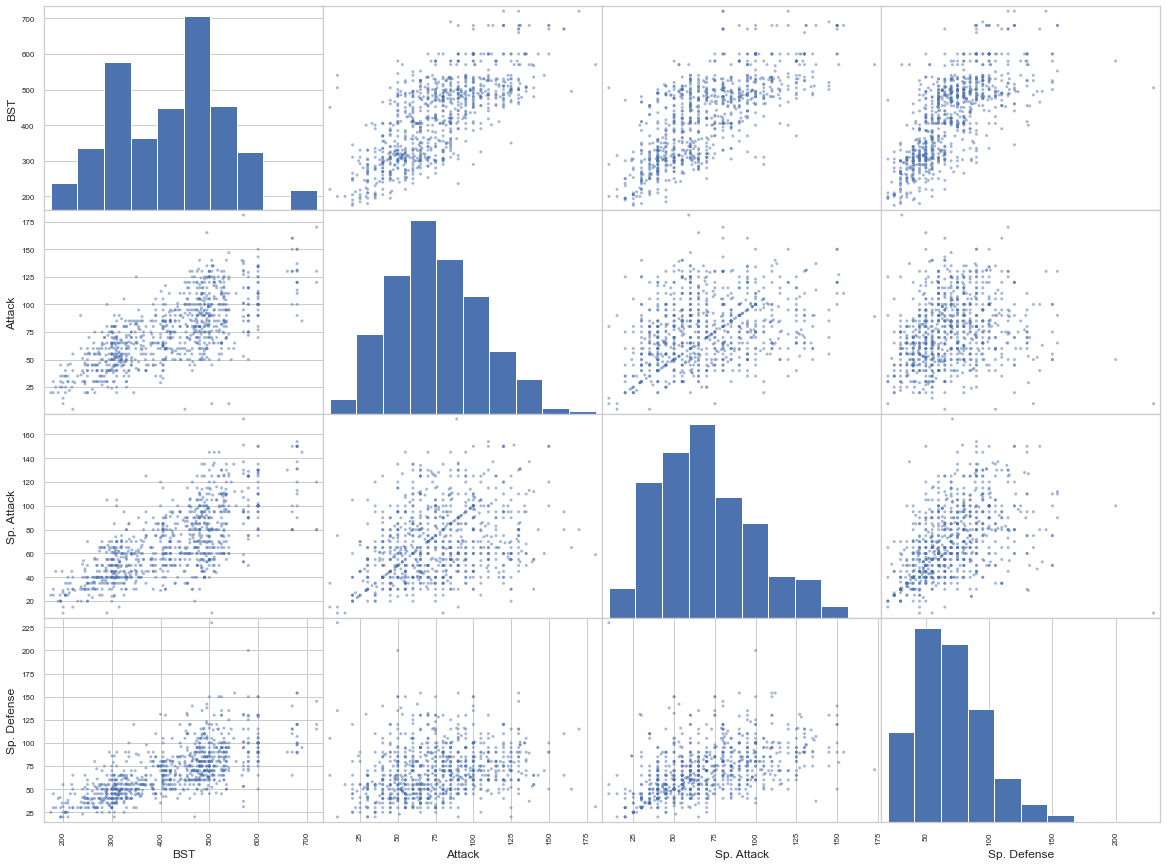

In [30]:
attributes = ['BST','Attack','Sp. Attack','Sp. Defense']
scatter_matrix(cleaned_pokedex[attributes], figsize=(20,15))

### 1.7.3 PairGrid of Archtype 

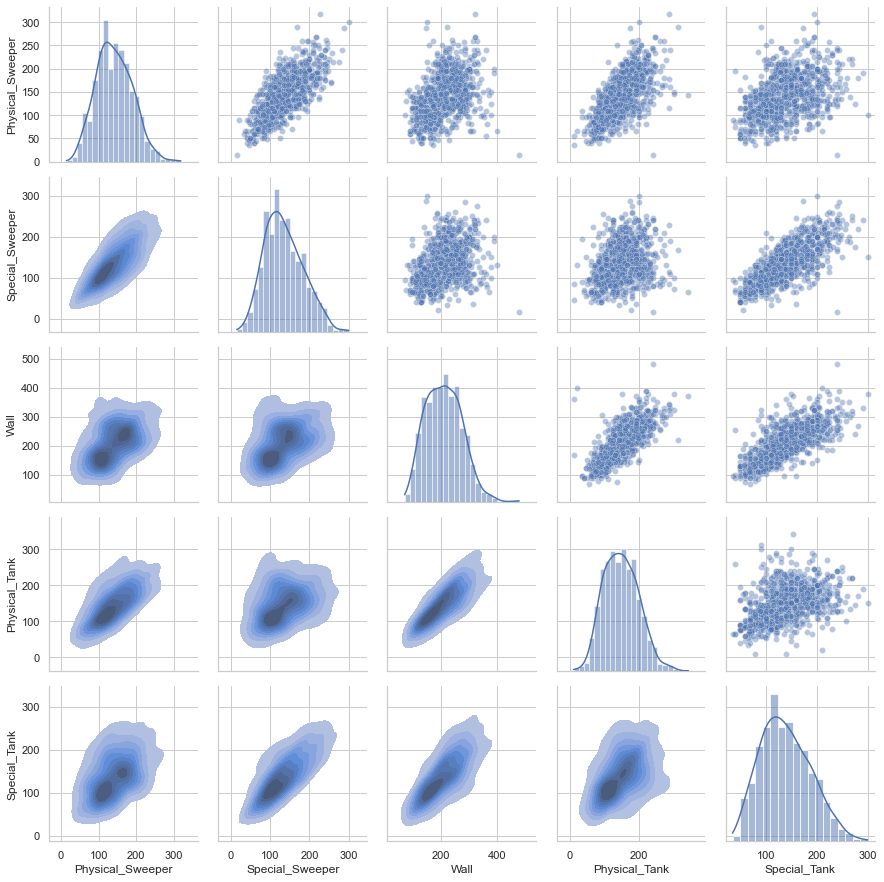

In [31]:
grid = cleaned_pokedex[['Physical_Sweeper',
                        'Special_Sweeper',
                        'Wall',
                        'Physical_Tank',
                        'Special_Tank']]
g = sns.PairGrid(grid)
g.map_upper(sns.scatterplot, alpha=0.4)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)


### 1.7.4 Heatmap of features

<AxesSubplot:>

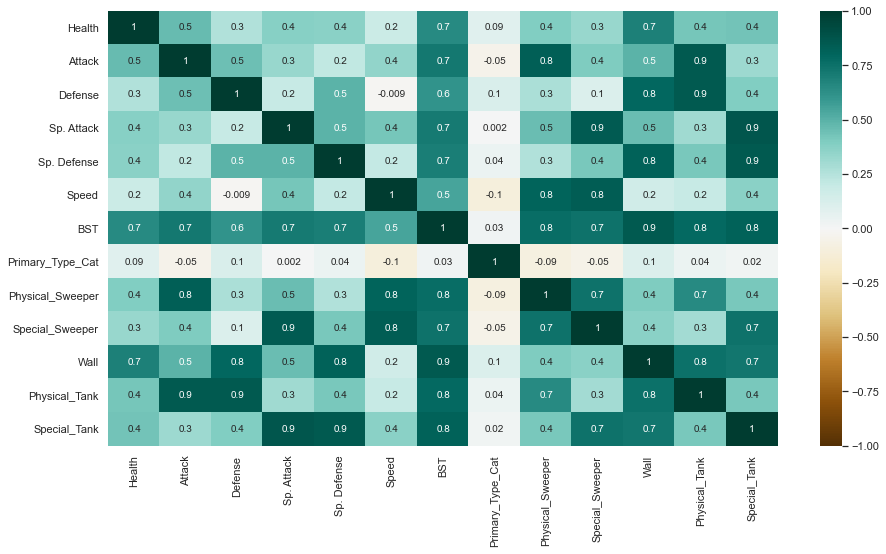

In [32]:
fig = plt.gcf()
fig.set_size_inches(15,8)
sns.heatmap(cleaned_pokedex.corr(),annot = True,fmt='.1g',vmin=-1,vmax=1,center=0,cmap='BrBG')


## 1.8 Data Visualization of Strongest Correlations to Base Stat.
-based on Median values from Each Type.

In [33]:
pd.set_option("display.max_rows", None,"display.max_columns",None)

Physical_Sweeper_Median = pd.pivot_table(cleaned_pokedex, values="Physical_Sweeper", index = 'Primary Type',
                       aggfunc={"Physical_Sweeper": np.median})
                            
Final_Physical_Sweeper_Median = Physical_Sweeper_Median.nlargest(18,'Physical_Sweeper')

print(Final_Physical_Sweeper_Median)

              Physical_Sweeper
Primary Type                  
Dragon                   181.0
Fighting                 170.0
Fire                     162.5
Electric                 156.5
Flying                   154.0
Ground                   153.0
Dark                     148.0
Steel                    140.0
Normal                   140.0
Poison                   137.0
Water                    134.0
Rock                     132.5
Ice                      130.0
Ghost                    126.0
Grass                    125.0
Psychic                  120.0
Bug                      120.0
Fairy                    117.0


### 1.8.1 Physical Sweeper

<AxesSubplot:xlabel='Physical_Sweeper', ylabel='Primary Type'>

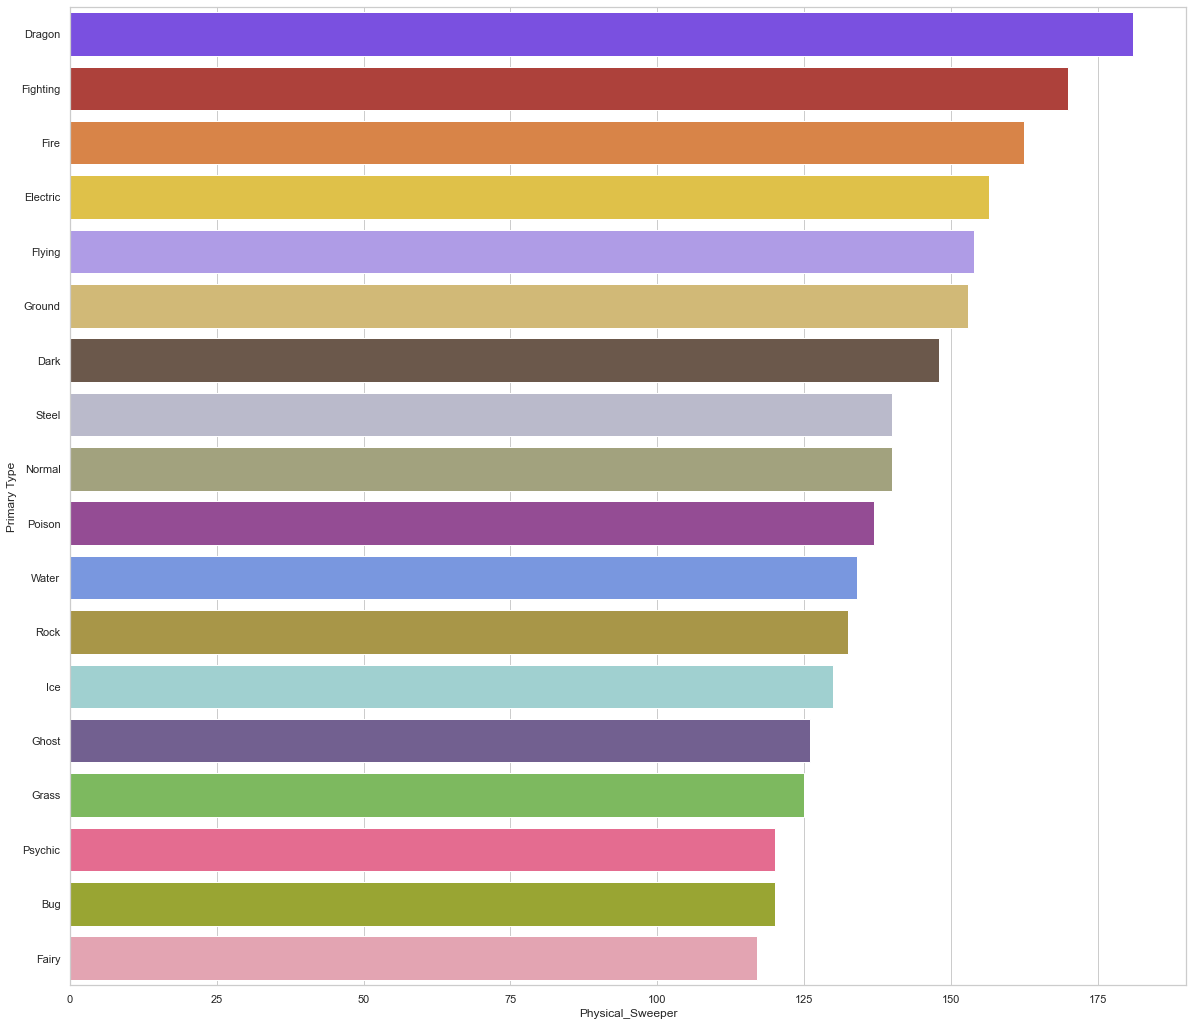

In [34]:
fig = plt.gcf()
fig.set_size_inches(20,18)

# Color Orient the types
pkmn_type_colors_Psweeper = [
                    '#7038F8',  # Dragon
                    '#C03028',  # Fighting
                    '#F08030',  # Fire
                    '#F8D030',  # Electric
                    '#A98FF3',  # Flying
                    '#E0C068',  # Ground
                    '#705746',  # Dark
                    '#B7B7CE',  # Steel
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#6890F0',  # Water
                    '#B8A038',  # Rock
                    '#98D8D8',  # Ice
                    '#705898',  # Ghost
                    '#78C850',  # Grass
                    '#F85888',  # Psychic
                    '#A8B820',  # Bug
                    '#EE99AC',  # Fairy
                    ]

sns.barplot(x=Final_Physical_Sweeper_Median.Physical_Sweeper, y=Final_Physical_Sweeper_Median.index, palette = pkmn_type_colors_Psweeper)

### 1.8.2 Special Sweeper

In [35]:
Special_Sweeper_Median = pd.pivot_table(cleaned_pokedex, values="Special_Sweeper", index = 'Primary Type',
                       aggfunc={"Special_Sweeper": np.median})
                            

Final_Special_Sweeper_Median = Special_Sweeper_Median.nlargest(18,'Special_Sweeper')

print(Final_Special_Sweeper_Median)

              Special_Sweeper
Primary Type                 
Electric                168.5
Psychic                 160.0
Fire                    157.0
Dragon                  153.5
Dark                    141.0
Ice                     140.0
Water                   135.0
Ghost                   132.5
Poison                  128.0
Grass                   127.5
Fairy                   127.5
Normal                  121.0
Flying                  120.0
Fighting                111.0
Ground                  110.0
Rock                    110.0
Steel                   110.0
Bug                     110.0


<AxesSubplot:xlabel='Special_Sweeper', ylabel='Primary Type'>

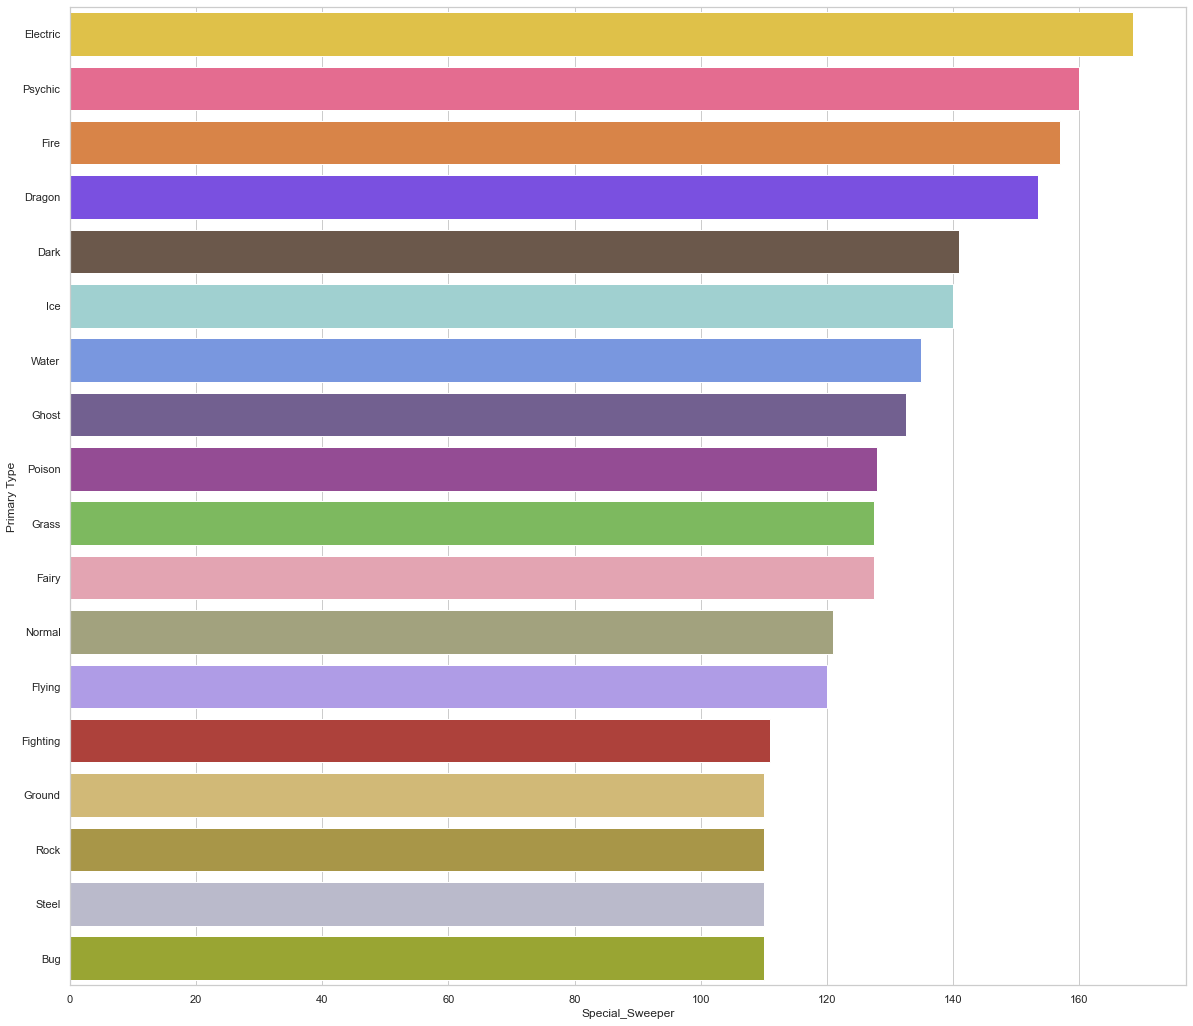

In [36]:
fig = plt.gcf()
fig.set_size_inches(20,18)

# Color Orient the types
pkmn_type_colors_Ssweeper = [
                    '#F8D030',  # Electric
                    '#F85888',  # Psychic
                    '#F08030',  # Fire
                    '#7038F8',  # Dragon
                    '#705746',  # Dark
                    '#98D8D8',  # Ice
                    '#6890F0',  # Water
                    '#705898',  # Ghost
                    '#A040A0',  # Poison
                    '#78C850',  # Grass
                    '#EE99AC',  # Fairy
                    '#A8A878',  # Normal
                    '#A98FF3',  # Flying
                    '#C03028',  # Fighting
                    '#E0C068',  # Ground
                    '#B8A038',  # Rock
                    '#B7B7CE',  # Steel
                    '#A8B820',  # Bug
                    
                    ]

sns.barplot(x=Final_Special_Sweeper_Median.Special_Sweeper, y=Final_Special_Sweeper_Median.index, palette = pkmn_type_colors_Ssweeper)

### 1.8.3 Wall

In [37]:
Wall_Median = pd.pivot_table(cleaned_pokedex, values="Wall", index = 'Primary Type',
                       aggfunc={"Wall": np.median})
                            
Final_Wall_Median = Wall_Median.nlargest(18,'Wall')

print(Final_Wall_Median)

               Wall
Primary Type       
Steel         259.0
Fairy         244.0
Dragon        237.0
Rock          235.5
Ground        235.0
Ice           230.0
Flying        220.0
Fighting      216.0
Ghost         215.0
Psychic       215.0
Grass         209.5
Water         208.0
Fire          204.0
Electric      201.0
Dark          200.0
Normal        194.0
Poison        193.0
Bug           180.0


<AxesSubplot:xlabel='Wall', ylabel='Primary Type'>

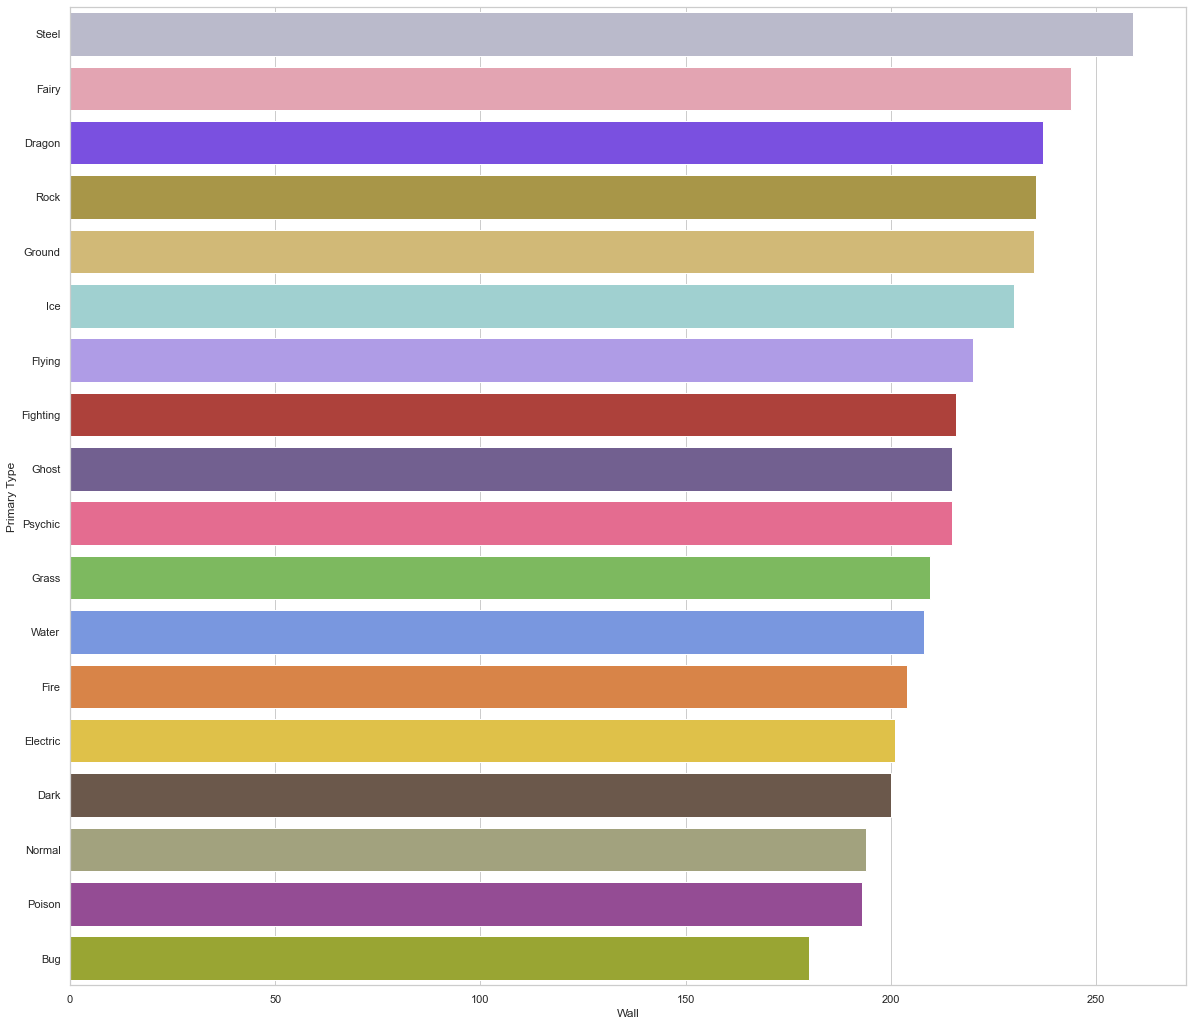

In [38]:
fig = plt.gcf()
fig.set_size_inches(20,18)
# Color Orient the types
pkmn_type_colors_Wall = [
                    '#B7B7CE',  # Steel
                    '#EE99AC',  # Fairy
                    '#7038F8',  # Dragon
                    '#B8A038',  # Rock
                    '#E0C068',  # Ground
                    '#98D8D8',  # Ice
                    '#A98FF3',  # Flying
                    '#C03028',  # Fighting
                    '#705898',  # Ghost
                    '#F85888',  # Psychic
                    '#78C850',  # Grass
                    '#6890F0',  # Water
                    '#F08030',  # Fire
                    '#F8D030',  # Electric
                    '#705746',  # Dark
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#A8B820',  # Bug
                    ]
# Ordered by index 
sns.barplot(x=Final_Wall_Median.Wall, y=Final_Wall_Median.index, palette = pkmn_type_colors_Wall)

### 1.8.4 Physical Tank

In [39]:
Physical_Tank_Median = pd.pivot_table(cleaned_pokedex, values="Physical_Tank", index = 'Primary Type',
                       aggfunc={"Physical_Tank": np.median})

Final_Physical_Tank_Median = Physical_Tank_Median.nlargest(18,'Physical_Tank')

print(Final_Physical_Tank_Median)

              Physical_Tank
Primary Type               
Steel                 204.5
Rock                  180.0
Fighting              180.0
Ground                180.0
Dragon                170.0
Dark                  154.0
Ice                   150.0
Fire                  147.0
Poison                146.0
Water                 145.0
Flying                140.0
Grass                 137.5
Electric              135.0
Normal                133.0
Ghost                 132.5
Fairy                 131.5
Bug                   125.0
Psychic               120.0


<AxesSubplot:xlabel='Physical_Tank', ylabel='Primary Type'>

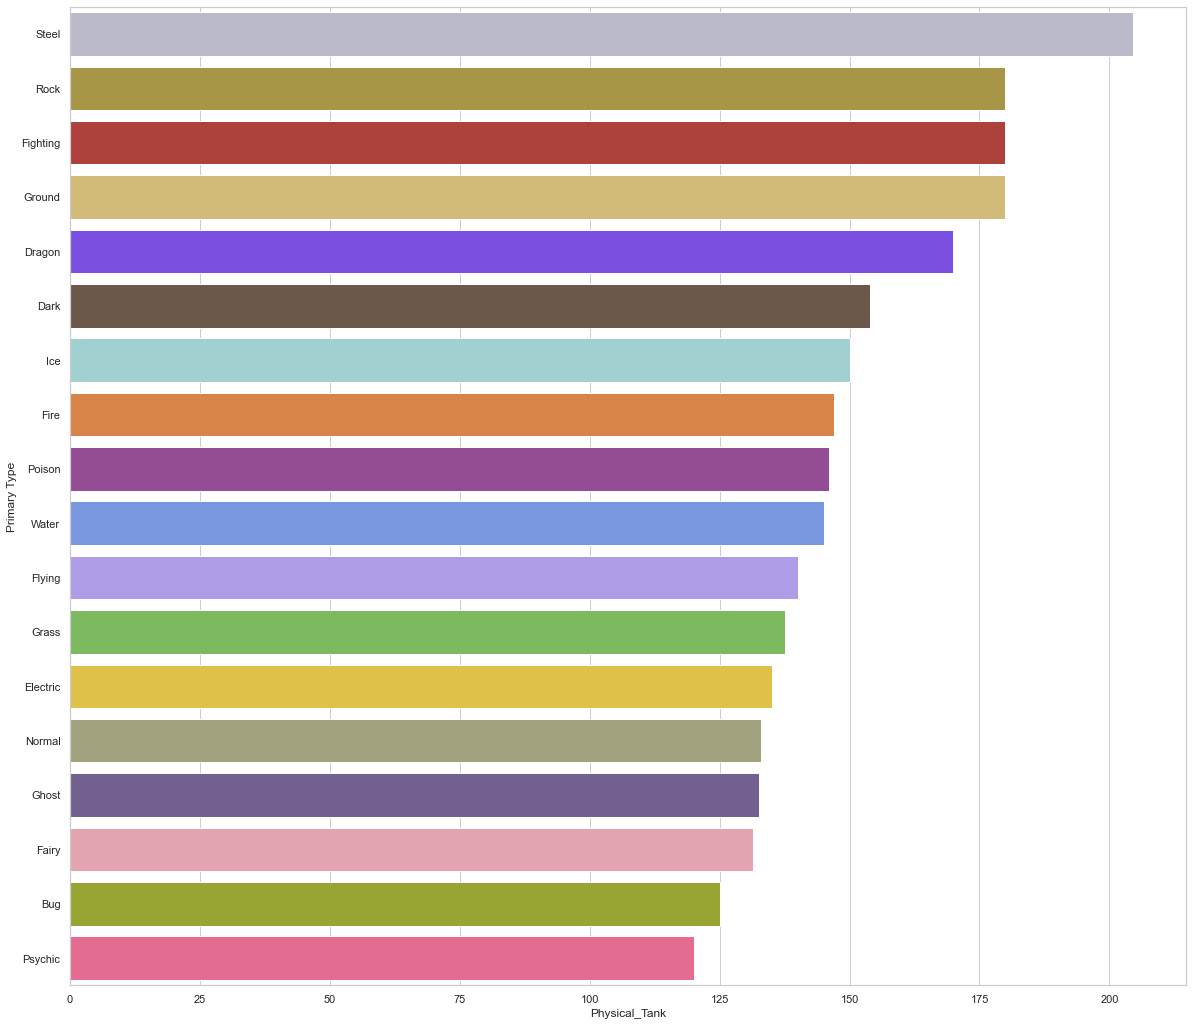

In [40]:
fig = plt.gcf()
fig.set_size_inches(20,18)

# Color Orient the types
pkmn_type_colors_Ptank = [
    
                    '#B7B7CE',  # Steel
                    '#B8A038',  # Rock
                    '#C03028',  # Fighting
                    '#E0C068',  # Ground
                    '#7038F8',  # Dragon
                    '#705746',  # Dark
                    '#98D8D8',  # Ice
                    '#F08030',  # Fire
                    '#A040A0',  # Poison
                    '#6890F0',  # Water
                    '#A98FF3',  # Flying
                    '#78C850',  # Grass
                    '#F8D030',  # Electric
                    '#A8A878',  # Normal
                    '#705898',  # Ghost
                    '#EE99AC',  # Fairy
                    '#A8B820',  # Bug
                    '#F85888',  # Psychic
]

sns.barplot(x=Final_Physical_Tank_Median.Physical_Tank, y=Final_Physical_Tank_Median.index, palette = pkmn_type_colors_Ptank)

### 1.8.5 Special Tank

In [41]:
Special_Tank_Median = pd.pivot_table(cleaned_pokedex, values="Special_Tank", index = 'Primary Type',
                       aggfunc={"Special_Tank": np.median})
                            
Final_Special_Tank_Median = Special_Tank_Median.nlargest(18,'Special_Tank')

print(Final_Special_Tank_Median)

              Special_Tank
Primary Type              
Psychic              185.0
Fairy                174.0
Dragon               157.5
Electric             155.0
Ghost                155.0
Ice                  150.0
Fire                 150.0
Grass                140.0
Steel                140.0
Water                139.0
Flying               138.0
Poison               135.0
Dark                 130.0
Rock                 130.0
Fighting             120.0
Bug                  120.0
Normal               115.0
Ground               110.0


<AxesSubplot:xlabel='Special_Tank', ylabel='Primary Type'>

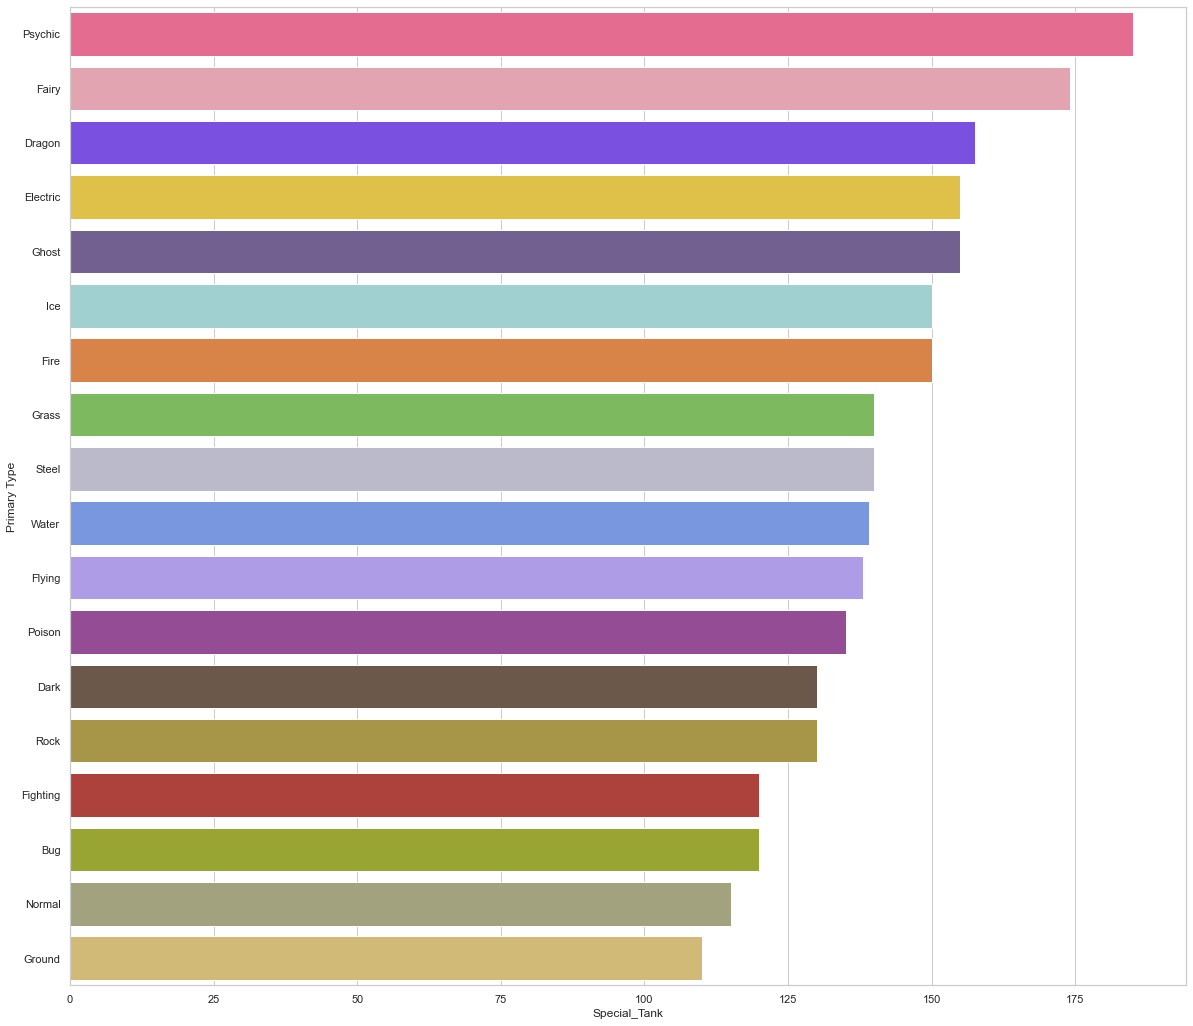

In [42]:
fig = plt.gcf()
fig.set_size_inches(20,18)

# Color Orient the types
pkmn_type_colors_Stank = [
                    '#F85888',  # Psychic
                    '#EE99AC',  # Fairy
                    '#7038F8',  # Dragon
                    '#F8D030',  # Electric
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#F08030',  # Fire
                    '#78C850',  # Grass
                    '#B7B7CE',  # Steel
                    '#6890F0',  # Water
                    '#A98FF3',  # Flying
                    '#A040A0',  # Poison
                    '#705746',  # Dark
                    '#B8A038',  # Rock
                    '#C03028',  # Fighting
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#E0C068',  # Ground                  
]

sns.barplot(x=Final_Special_Tank_Median.Special_Tank,
            y=Final_Special_Tank_Median.index,
            palette = pkmn_type_colors_Stank)

## 1.9 Creating DataFrame Based on Type apperances in the upper and bottom third of distribution.

In [31]:
from pandas import DataFrame
arch_type = {'Type': ['Dragon','Fight','Fire','Electric','Flying','Steel','Rock','Ground','Dark','Fairy','Ghost','Bug','Psychic','Grass','Normal','Poison','Water','Ice'],
             'Favorable_count':[5,2,2,3,1,2,2,2,1,2,1,0,2,0,0,0,0,3],
             'Unfavorable_count':[0,2,1,2,1,1,1,2,2,2,2,5,2,1,3,1,0,1]}

arch_type_df = DataFrame(arch_type,columns=['Type', 'Favorable_count', 'Unfavorable_count'])
print(arch_type_df)

        Type  Favorable_count  Unfavorable_count
0     Dragon                5                  0
1      Fight                2                  2
2       Fire                2                  1
3   Electric                3                  2
4     Flying                1                  1
5      Steel                2                  1
6       Rock                2                  1
7     Ground                2                  2
8       Dark                1                  2
9      Fairy                2                  2
10     Ghost                1                  2
11       Bug                0                  5
12   Psychic                2                  2
13     Grass                0                  1
14    Normal                0                  3
15    Poison                0                  1
16     Water                0                  0
17       Ice                3                  1


## 1.9.1 Plotting PairGrid point plot

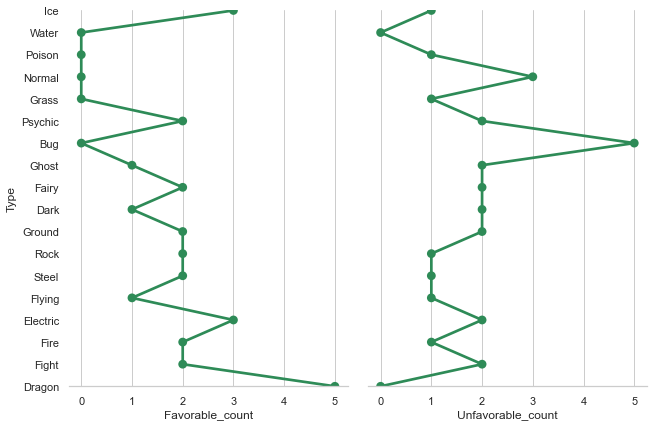

In [59]:
g = sns.PairGrid(arch_type_df, y_vars="Type", 
                x_vars=['Favorable_count','Unfavorable_count'],
                height=6, aspect=.75)

g.map(sns.pointplot, scale=1, errwidth=4, color='seagreen')
g.set(ylim=(0, 17))
sns.despine(fig=g.fig, left=True)

## 2.0 Visualization of the total number of pokemon introduced in each Generation.

In [43]:
# Count the number of Pokemon in each generation to be able to compare to the number of pokemon that represent 
# Type 1 and Type 2.


# -- Generation 1

pkmn_gen1 = cleaned_pokedex.apply(lambda x: True if x['Generation'] == 'Generation I' else False , axis=1)

numOfRows = len(pkmn_gen1[pkmn_gen1 == True].index)

print('Number of Pokemon in Generation 1 : ', numOfRows)

# -- Generation 2

pkmn_gen2 = cleaned_pokedex.apply(lambda x: True if x['Generation'] == 'Generation II' else False , axis=1)

numOfRows = len(pkmn_gen2[pkmn_gen2 == True].index)

print('Number of Pokemon in Generation 2 : ', numOfRows)

# -- Generation 3

pkmn_gen3 = cleaned_pokedex.apply(lambda x: True if x['Generation'] == 'Generation III' else False , axis=1)

numOfRows = len(pkmn_gen3[pkmn_gen3 == True].index)

print('Number of Pokemon in Generation 3 : ', numOfRows)

# -- Generation 4

pkmn_gen4 = cleaned_pokedex.apply(lambda x: True if x['Generation'] == 'Generation IV' else False , axis=1)

numOfRows = len(pkmn_gen4[pkmn_gen4 == True].index)

print('Number of Pokemon in Generation 4 : ', numOfRows)

# -- Generation 5

pkmn_gen5 = cleaned_pokedex.apply(lambda x: True if x['Generation'] == 'Generation V' else False , axis=1)

numOfRows = len(pkmn_gen5[pkmn_gen5 == True].index)

print('Number of Pokemon in Generation 5 : ', numOfRows)

# -- Generation 6

pkmn_gen6 = cleaned_pokedex.apply(lambda x: True if x['Generation'] == 'Generation VI' else False , axis=1)

numOfRows = len(pkmn_gen6[pkmn_gen6 == True].index)

print('Number of Pokemon in Generation 6 : ', numOfRows)

# -- Generation 7

pkmn_gen7 = cleaned_pokedex.apply(lambda x: True if x['Generation'] == 'Generation VII' else False , axis=1)

numOfRows = len(pkmn_gen7[pkmn_gen7 == True].index)

print('Number of Pokemon in Generation 7 : ', numOfRows)

# -- Generation 8

pkmn_gen8 = cleaned_pokedex.apply(lambda x: True if x['Generation'] == 'Generation VIII' else False , axis=1)

numOfRows = len(pkmn_gen8[pkmn_gen8 == True].index)

print('Number of Pokemon in Generation 8 : ', numOfRows)



Number of Pokemon in Generation 1 :  151
Number of Pokemon in Generation 2 :  100
Number of Pokemon in Generation 3 :  135
Number of Pokemon in Generation 4 :  107
Number of Pokemon in Generation 5 :  156
Number of Pokemon in Generation 6 :  72
Number of Pokemon in Generation 7 :  88
Number of Pokemon in Generation 8 :  83


<BarContainer object of 8 artists>

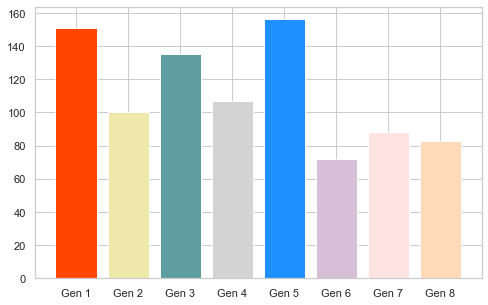

In [44]:
gens = ['Gen 1','Gen 2','Gen 3','Gen 4','Gen 5','Gen 6','Gen 7','Gen 8']
total_count_per_gen = [151, 100, 135, 107, 156, 72, 88, 83]
plt.figure(figsize=(8,5))
plt.bar(gens, total_count_per_gen, width = 0.8, color=("orangered","palegoldenrod","cadetblue","lightgrey","dodgerblue","thistle","mistyrose","peachpuff"))

## 3.0 Saving Cleaned and Structured Dataset to CSV

In [46]:
cleaned_pokedex.to_csv('/Users/jtc/Desktop/Pokedex_EDA_Project/Data/cleaned_pokedex.csv', index=False)